IMPORT LIBRARY

In [89]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

LOAD DATA DAN RAPIHIN KOLOM

In [90]:
df= pd.read_csv('Stress-Lysis.csv')
df.columns = df.columns.str.strip().str.replace("","_")

In [91]:
df.head()

,_H_u_m_i_d_i_t_y_,_T_e_m_p_e_r_a_t_u_r_e_,_S_t_e_p_ _c_o_u_n_t_,_S_t_r_e_s_s_ _L_e_v_e_l_
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


SIAPKAN DATA

In [92]:
X = df[['_H_u_m_i_d_i_t_y_', '_T_e_m_p_e_r_a_t_u_r_e_', '_S_t_e_p_ _c_o_u_n_t_']]
Y = df['_S_t_r_e_s_s_ _L_e_v_e_l_']

SPLIT DATA

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [94]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL 

In [95]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, Y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

EVALUASI DAN TAMPILKAN AKURASI

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred = model.predict(X_test_scaled)
print("Akurasi:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



CONFUSION MATRIX 

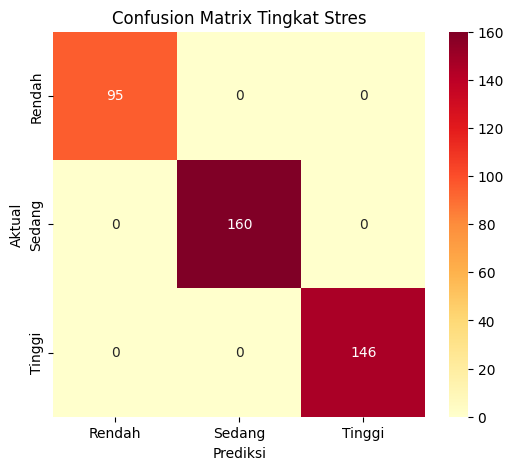

In [98]:

labels = ['Rendah', 'Sedang', 'Tinggi']
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Tingkat Stres")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

SIMULASI PREDIKSI

In [ ]:
import numpy as np
import joblib

# Load model dan scaler
model = joblib.load("Model_stres.pkl")
scaler = joblib.load("scaler_stres.pkl")

# Data input: [kelembapan, suhu, jumlah langkah]
input_data = [10.45,79.45,45]  # ← ganti dengan nilai data kamu

# Proses prediksi
input_np = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_np)
hasil_prediksi = model.predict(input_scaled)

# Mapping angka ke deskripsi stres
deskripsi = {
    0: "Tingkat stres kamu Rendah ",
    1: "Tingkat stres kamu Sedang ",
    2: "Tingkat stres kamu Tinggi "
}

# Cetak hasil sesuai format yang kamu minta
print(f"[{hasil_prediksi[0]}]")
print(deskripsi.get(hasil_prediksi[0], "Kategori tidak dikenali? "))

[0]
Tingkat stres kamu Rendah 


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
joblib.dump(model, 'Model_stres.pkl')
joblib.dump(scaler, 'scaler_stres.pkl')

['scaler_stres.pkl']